In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

df=pd.read_csv('gld_price_data.csv')
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
correlation=df.corr()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_20952\1332955121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


In [9]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [10]:
X=df.drop(['Date','GLD'],axis=1)
Y=df['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [11]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [13]:
regressor=RandomForestRegressor(n_estimators=100)


In [14]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [16]:
test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[168.5451993   82.0364998  115.68890009 127.65570042 120.61250069
 154.61779769 150.14519849 126.09550025 117.32769872 125.97370128
 116.93960075 171.84000032 142.15849857 167.79689875 115.12690005
 117.78290042 138.97090334 170.03880029 158.95280225 161.70619989
 155.11550026 125.20070015 176.46059914 157.08950381 125.26560047
  93.74219965  77.43480019 120.59509984 119.04599918 167.42750011
  88.34390081 125.22170023  91.0850008  117.72900021 121.038699
 136.14860096 115.27780118 114.96520086 145.64409973 107.23130103
 104.33950244  87.20099783 126.57580048 118.20669998 152.2209989
 119.72410001 108.43560026 108.21109807  93.1708004  127.1286977
  74.90380036 113.67029922 121.50259981 111.28369913 118.87919902
 120.77389919 159.06170041 166.34850188 147.02659651  85.89179864
  94.37720018  86.81199859  90.5731997  119.05690049 126.39980064
 127.52750036 168.68329997 122.28289917 117.58039883  98.44270058
 168.3234021  142.75249735 132.31690274 121.14280203 120.44409932
 119.72100047 

In [17]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R Squared error:',error_score)

R Squared error: 0.9897680014382227


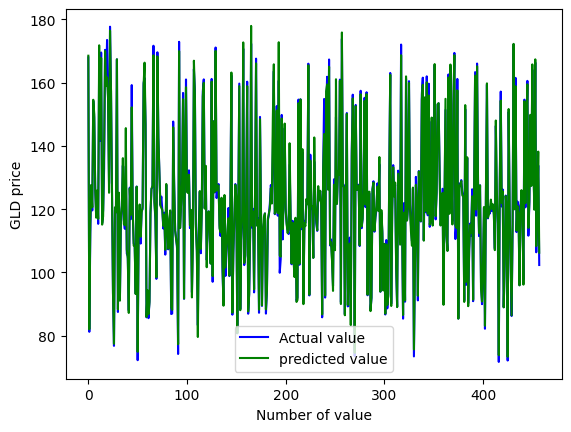

In [18]:
Y_test=list(Y_test)
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(test_data_prediction,color='green',label='predicted value')
plt.xlabel('Number of value')
plt.ylabel('GLD price')
plt.legend()
plt.show()